![](https://media.giphy.com/media/oenruB2DKC7p6/giphy.gif)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
   #     print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# Loading the dataset

In [ ]:
netflix_overall=pd.read_csv('../content/netflix_titles.csv')
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


Therefore, it is clear that the dataset contains 12 columns for exploratory analysis.

In [ ]:
netflix_overall.count()

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [ ]:
netflix_shows=netflix_overall[netflix_overall['type']=='TV Show']


In [ ]:
netflix_movies=netflix_overall[netflix_overall['type']=='Movie']

![image.png](attachment:image.png)

# Analysis of Movies vs TV Shows.

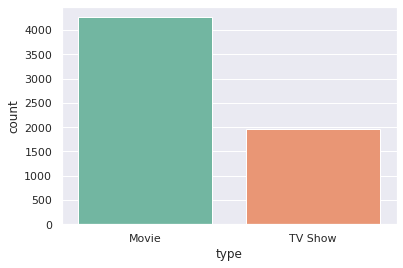

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_overall, palette="Set2")

In [ ]:
netflix_overall.type.value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

It is evident that there are more Movies on Netflix than TV shows.

# If a producer wants to release some content, which month must he do so?( Month when least amount of content is added)

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


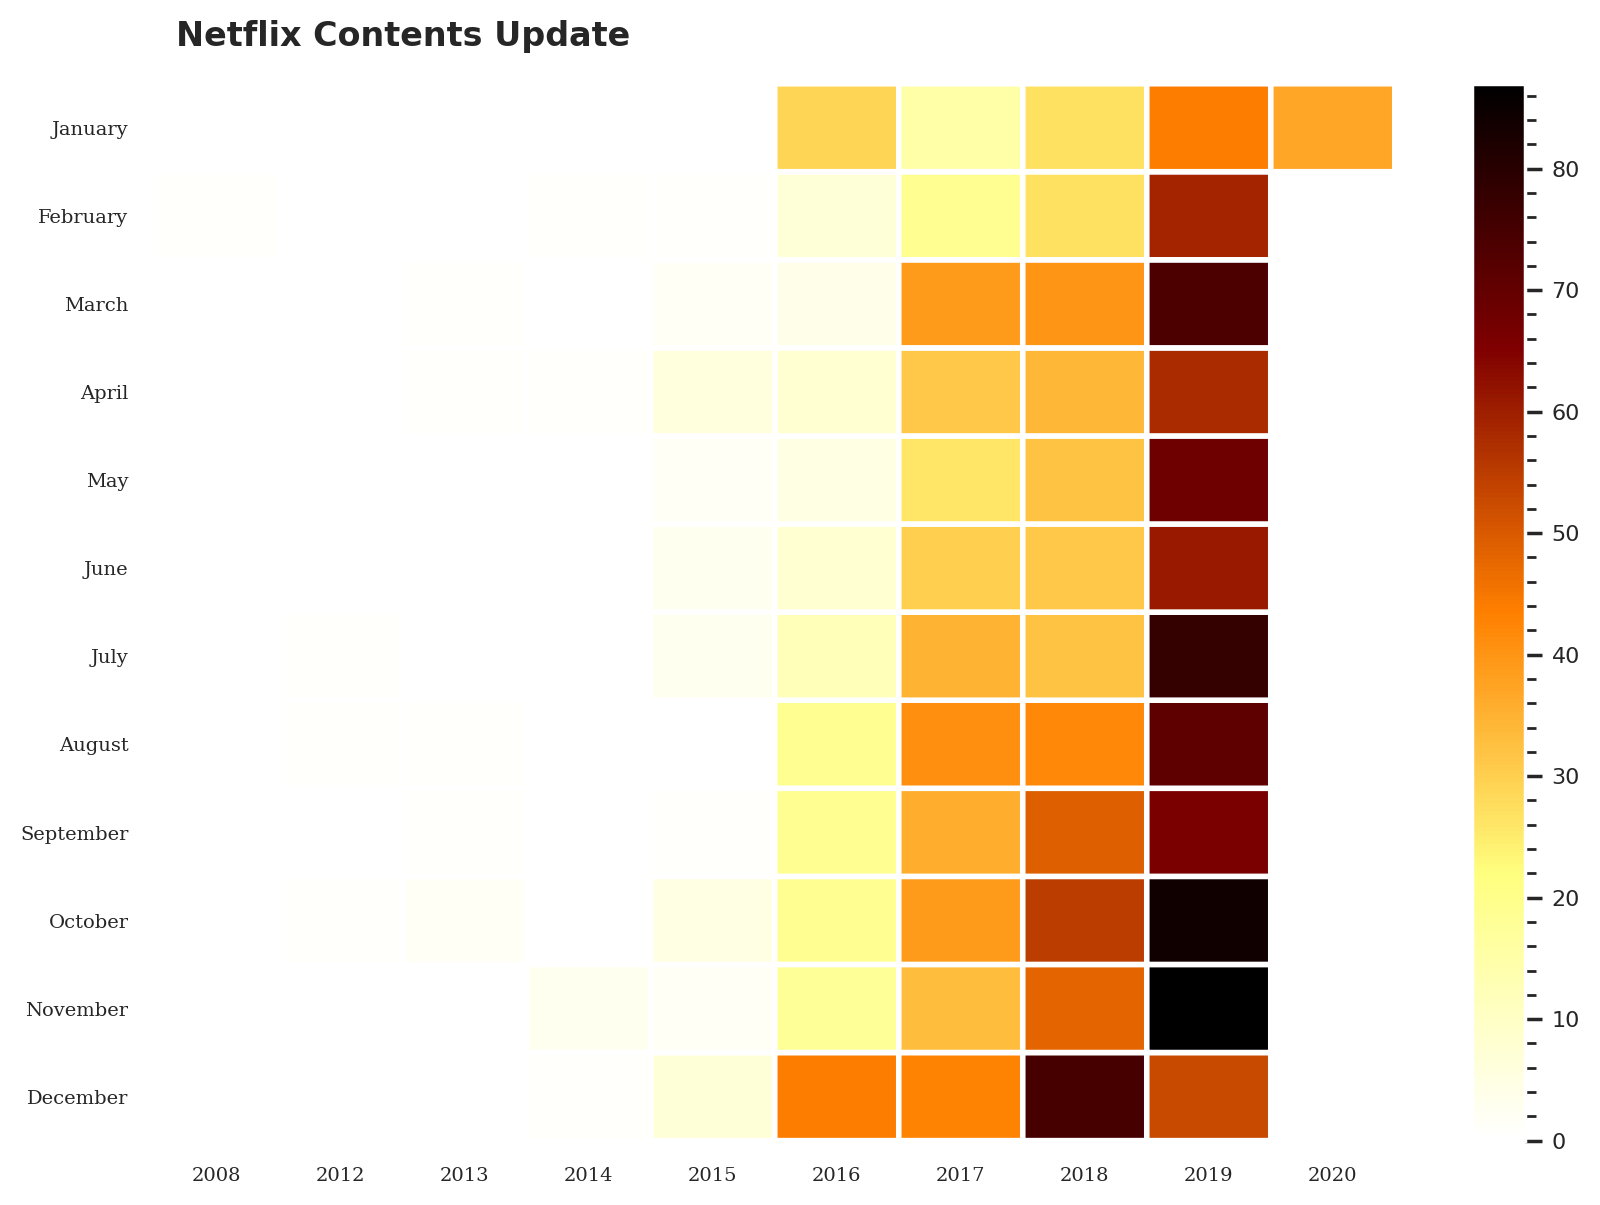

In [ ]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='afmhot_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()

If the latest year 2019 is considered, January and December were the months when comparatively much less content was released.Therefore, these months may be a good choice for the success of a new release!

# Movie ratings analysis

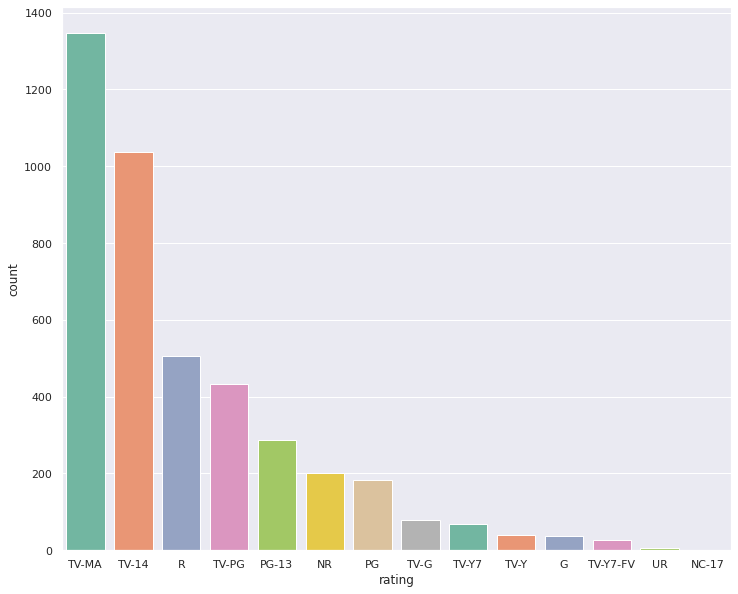

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only. 

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

Third largest is the  very popular 'R' rating.An R-rated film is a film that has been assessed as having material which may be unsuitable for children under the age of 17 by the Motion Picture Association of America; the MPAA writes "Under 17 requires accompanying parent or adult guardian".

# Analysing IMDB ratings to get top rated movies on Netflix

In [ ]:
imdb_ratings=pd.read_csv('../content/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('../content/IMDb movies.csv', usecols=['title','year','genre'])
ratings = pd.DataFrame({'Title':imdb_titles.title,
                    'Release Year':imdb_titles.year,
                    'Rating': imdb_ratings.weighted_average_vote,
                    'Genre':imdb_titles.genre})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape

(33833, 4)

Performing inner join on the ratings dataset and netflix dataset to get the content that has both ratings on IMDB and are available on Netflix.

In [ ]:
ratings.dropna()
joint_data=ratings.merge(netflix_overall,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

Top rated 10 movies on Netflix are:

In [ ]:
import plotly.express as px
top_rated=joint_data[0:10]
fig =px.sunburst(
    top_rated,
    path=['title','country'],
    values='Rating',
    color='Rating')
fig.show()

Countries with highest rated content.

In [ ]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,country
United States,85
India,59
United Kingdom,19
France,8
Spain,8
Australia,7
South Korea,7
Canada,7
"United Kingdom, United States",4
"United States, Germany, United Kingdom",4


In [ ]:
import plotly.express as px
data = dict(
    number=[85,59,19,8,8,7,7,7,4,4,4],
    country=["United States", "India", "United Kingdom", "France", "Spain", "Australia","South Korea",
             "Canada",'United Kingdom, United States','United States, Germany, United Kingdom','Brazil'])
fig = px.funnel(data, x='number', y='country')
fig.show()

In [ ]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}


# TOP 10 MOVIE CONTENT CREATING COUNTRIES

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'India'),
 Text(0, 0, 'Australia')]

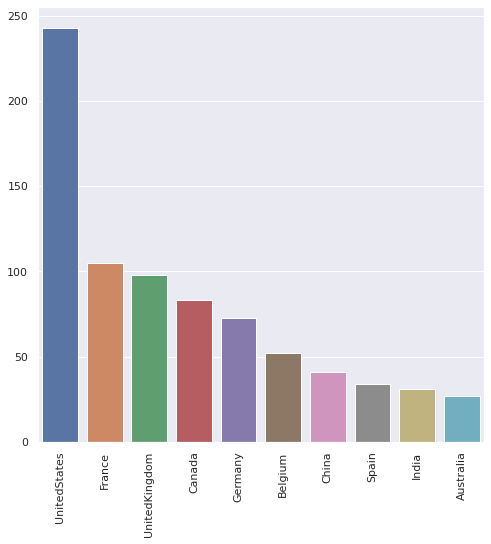

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)


# Analysis of duration of movies

In [ ]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        90
1        94
4        99
6       110
7        60
       ... 
5577     70
5578    102
5579     88
5580    109
6231     60
Name: duration, Length: 4265, dtype: int64

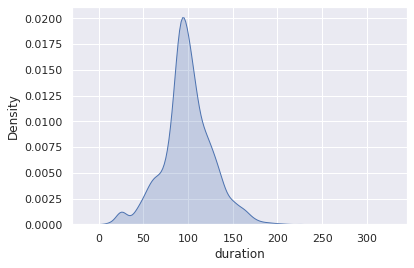

In [ ]:
sns.set(style="darkgrid")
sns.kdeplot(data=netflix_movies['duration'], shade=True)

So, a good amount of movies on Netflix are among the duration of 75-120 mins. It is acceptable considering the fact that a fair amount of the audience cannot watch a 3 hour movie in one sitting. Can you? :p

In [ ]:
from collections import Counter

genres=list(netflix_movies['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

# WordCloud for Genres.

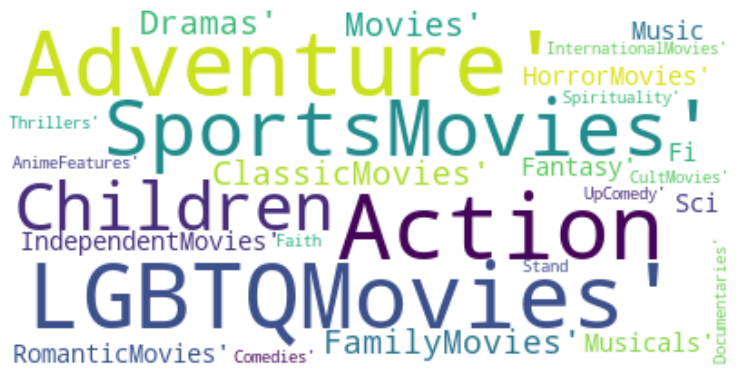

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Lollipop plot of Genres vs their count on Netflix

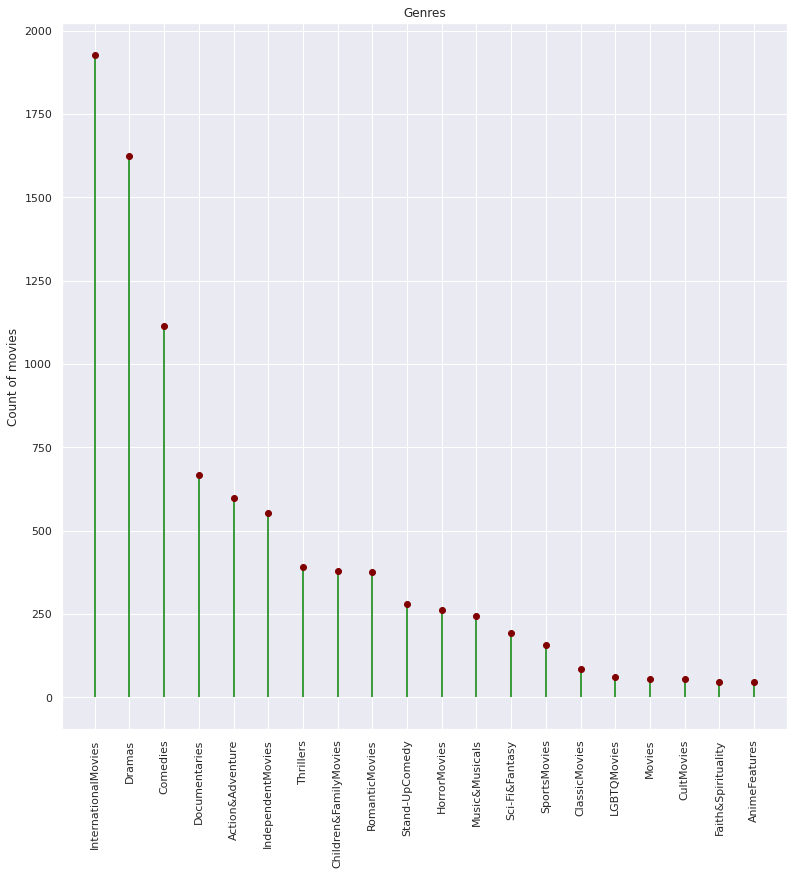

<Figure size 720x720 with 0 Axes>

In [ ]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

Therefore, it is clear that international movies, dramas and comedies are the top three genres that have the highest amount of content on Netflix.

# Analysis of TV SERIES on Netflix

In [ ]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}


# Most content creating countries

Text(0, 0.5, 'Arrival delay (in minutes)')

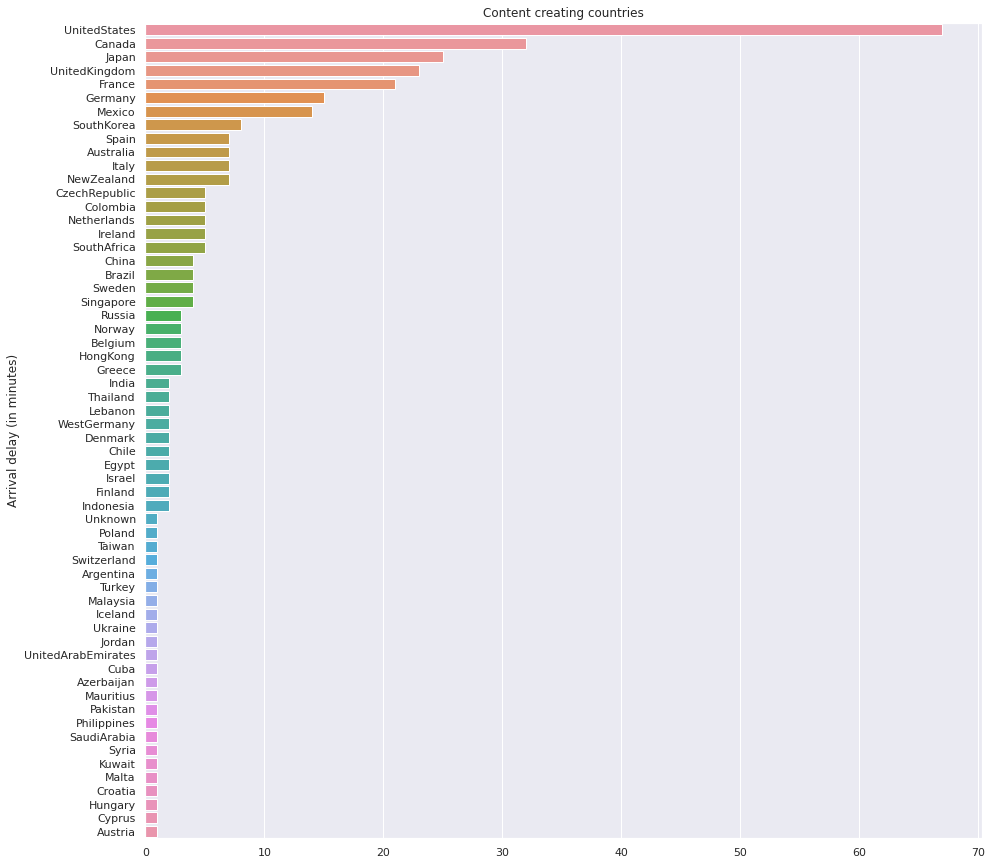

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

Naturally, United States has the most content that is created on netflix in the tv series category.

In [ ]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# TV shows with largest number of seasons

In [ ]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

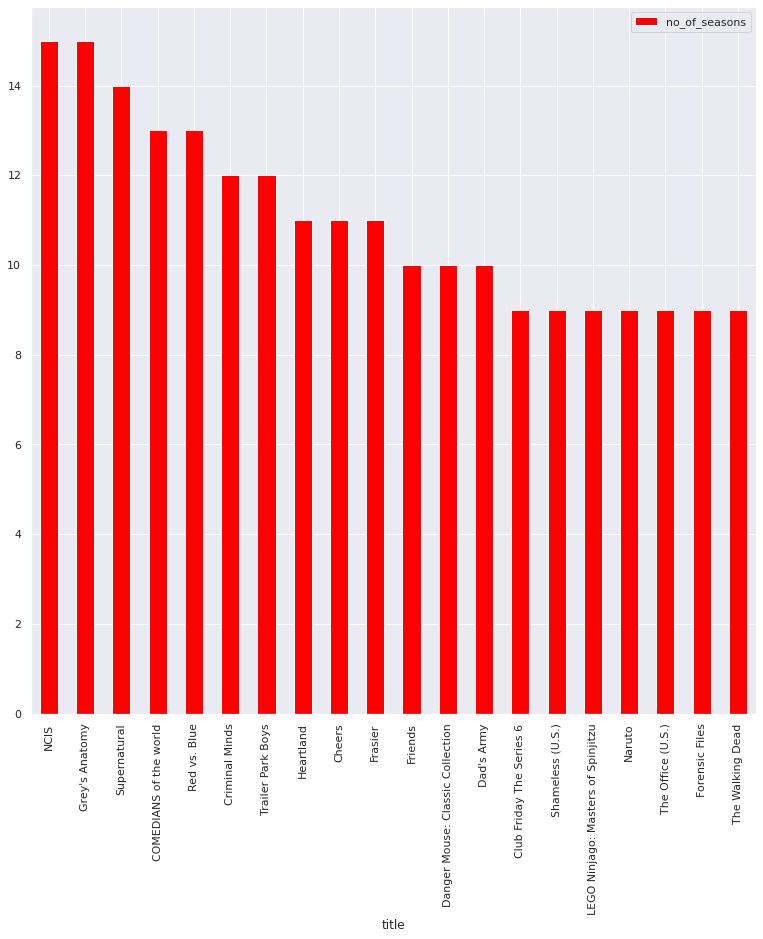

In [ ]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

Thus, NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons.

# Lowest number of seasons.

In [ ]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

These are some binge-worthy shows that are short and have only one season.

In [ ]:
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

# Word Cloud for Genres

A word cloud is an image made of words that together resemble a cloudy shape.

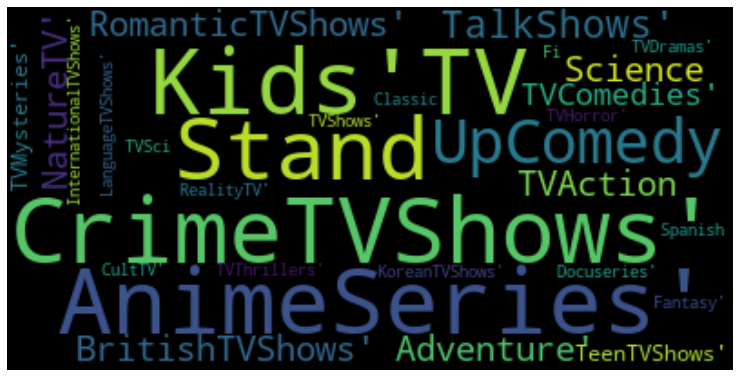

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
us_series_data=netflix_shows[netflix_shows['country']=='United States']

In [ ]:
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                     ])
fig.show()

Above table shows the oldest US tv shows on Netflix.

In [ ]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

The above are latest released US television shows!

# Content in Indonesia

In [ ]:
netflix_fr=netflix_overall[netflix_overall['country']=='Indonesia']
nannef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()


In [ ]:
nannef['director'].value_counts()

Rocky Soraya                        5
Riri Riza                           5
Angga Dwimas Sasongko               3
Hanung Bramantyo                    3
Raditya Dika                        2
Nia Dinata                          2
Rizal Mantovani                     2
Ifa Isfansyah                       2
Agasyah Karim, Khalid Kashogi       1
Rudy Soedjarwo                      1
Rocky Soraya, Anggy Umbara          1
Lucky Kuswandi                      1
Guntur Soeharjanto                  1
Sridhar Jetty                       1
Andibachtiar Yusuf                  1
Timo Tjahjanto                      1
Garin Nugroho                       1
Rudy Soedjarwo, Riri Riza           1
Sunil Soraya                        1
Gareth Evans                        1
Edwin                               1
Kabir Bhatia, Titien Wattimena      1
Kuntz Agus                          1
Awi Suryadi                         1
Iman Brotoseno                      1
Timo Tjahjanto, Kimo Stamboel       1
Hanung Brama

It is very interesting to note that the content in France is very rational. There is no director in the data who has a large number of movies. In my opinion, it shows how different directors are given a chance to showcase their talents. What do you think?

In [ ]:
newest_fr_series=netflix_fr.sort_values(by='release_year', ascending=False)

In [ ]:
newest_fr_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2671,81088277,Movie,The 3rd Eye 2,Rocky Soraya,"Jessica Mila, Bianca Hello, Nabilah Ayu, Sophi...",Indonesia,"June 13, 2019",2019,TV-MA,117 min,"Horror Movies, International Movies","Working in an orphanage, Alia meets teen Nadia..."
1288,81030893,Movie,May the Devil Take You,Timo Tjahjanto,"Chelsea Islan, Pevita Pearce, Samo Rafael, Kar...",Indonesia,"November 15, 2018",2018,TV-MA,111 min,"Horror Movies, International Movies",Hoping to find answers to her estranged father...
436,81016338,Movie,Love for Sale,Andibachtiar Yusuf,"Gading Marten, Della Dartyan, Rukman Rosadi, A...",Indonesia,"October 6, 2019",2018,TV-14,101 min,"Dramas, International Movies, Romantic Movies",Richard accepts a bet that he can't find a com...
1201,81021832,Movie,Target,Raditya Dika,"Raditya Dika, Cinta Laura Kiehl, Samuel Rizal,...",Indonesia,"November 20, 2018",2018,TV-14,91 min,"Comedies, Horror Movies, International Movies","Trapped in an empty building, nine people are ..."
1200,81021831,Movie,Sabrina,Rocky Soraya,"Luna Maya, Christian Sugiono, Sara Wijayanto, ...",Indonesia,"November 20, 2018",2018,TV-MA,114 min,"Horror Movies, International Movies",A toy manufacturer and his wife are terrorized...
748,81021082,Movie,Kuntilanak,Rizal Mantovani,"Sandrinna M Skornicki, Aurélie Moeremans, Fero...",Indonesia,"October 12, 2018",2018,TV-14,106 min,"Horror Movies, International Movies",Five youngsters discover that an antique mirro...
5251,81062674,Movie,Suzzanna: Buried Alive,"Rocky Soraya, Anggy Umbara","Luna Maya, Herjunot Ali, Teuku Rifnu Wikana, V...",Indonesia,"April 3, 2019",2018,TV-MA,126 min,"Horror Movies, International Movies","After a pregnant woman is murdered, her spirit..."
95,81016750,Movie,The 3rd Eye,Rocky Soraya,"Jessica Mila, Denny Sumargo, Citra Prima, Bian...",Indonesia,"September 28, 2018",2018,TV-MA,108 min,"Horror Movies, International Movies",When her little sister claims she sees the dea...
3271,81047901,Movie,Surga Yang Tak Dirindukan 2,"Hanung Bramantyo, Meisa Felaroze","Fedi Nuril, Raline Shah, Laudya Cynthia Bella,...",Indonesia,"January 28, 2019",2017,TV-14,119 min,"Dramas, Faith & Spirituality, International Mo...","In this sequel to the award-winning 2015 film,..."
3551,81140307,Movie,Posesif,Edwin,"Putri Marino, Adipati Dolken, Gritte Agatha, C...",Indonesia,"January 1, 2020",2017,TV-14,102 min,"Dramas, International Movies, Romantic Movies",A student diver risks her scholastic future an...


In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_fr_series['title'],newest_fr_series['release_year']]))
                     ])
fig.show()

In [ ]:
newest_fr_series.director.count()

43

# Top Duration

In [ ]:
topdirs=pd.value_counts(netflix_overall['duration'])
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values , text=topdirs.values,marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

It can be inferred that having one season is the most preferred duration.

## A little interesting history

Even though it may look like Netflix is fairly new, it has been around since 1997! 

Here's a picture of the older Netflix website when rentals costed only 50 cents each and the website had only about 900 titles.

![](https://producthabits.com/wp-content/uploads/2018/04/Screenshot-2018-03-26-16.08.07.png)

# Recommendation System (Content Based)

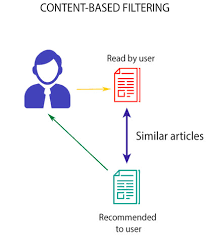

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(6234, 16151)

There are about 16151 words described for the 6234 movies in this dataset.

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

<img src='https://i.stack.imgur.com/36r1U.png'>

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

This recommendation is just based on the Plot.

In [ ]:
get_recommendations('Peaky Blinders')

296                     Our Godfather
4491                              Don
2015                         The Fear
4852    Jonathan Strange & Mr Norrell
1231                       The Prison
3737                Power Rangers Zeo
5986                       The Tudors
1753      Once Upon a Time in Mumbaai
5494     The Legend of Michael Mishra
1142                  Shelby American
Name: title, dtype: object

In [ ]:
get_recommendations('Mortel')

3016                  PILI Fantasy: War of Dragons
5688         Edgar Rice Burroughs' Tarzan and Jane
4401                             Figures of Speech
2001                                     FirstBorn
3310    My Entire High School Sinking Into the Sea
5307                                 Psychokinesis
4332                                At First Light
3955                          The Umbrella Academy
1761                                     Chamatkar
5421                              Maharakshak Devi
Name: title, dtype: object

In [ ]:
get_recommendations('The Umbrella Academy')

2101                     The Amazing Praybeyt Benjamin
5307                                     Psychokinesis
2946    Frankenstein’s Monster’s Monster, Frankenstein
1624                                Despite Everything
3895                                          The Bros
3177                               The Future of Water
6184                                             Wakfu
3307                                          Innocent
3070                            Race to Witch Mountain
2838                             Welcome to the Family
Name: title, dtype: object

In [ ]:
get_recommendations('Kuntilanak')

3444                                  Historia de un clan
2309                             Paranormal Investigation
3535        Legend of the Guardians: The Owls of Ga'Hoole
350                                     The Keeping Hours
4407                                                Iyore
3148    Learning Songs by Little Baby Bum: Nursery Rhy...
1220                                 The Holiday Calendar
4854                                              Fanatic
283                                   The Mind, Explained
1075                                        Akulah Balqis
Name: title, dtype: object

It is seen that the model performs well, but is not very accurate.Therefore, more metrics are added to the model to improve performance.

# Content based filtering on multiple metrics

Content based filtering on the following factors:
* Title
* Cast
* Director
* Listed in
* Plot

Filling null values with empty string.

In [ ]:
filledna=netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


Cleaning the data - making all the words lower case

In [ ]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

Identifying features on which the model is to be filtered.

In [ ]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [ ]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,normofthenorth:kingsizedadventure,"richardfinn,timmaltby","alanmarriott,andrewtoth,briandobson,colehoward...","children&familymovies,comedies",beforeplanninganawesomeweddingforhisgrandfathe...
1,jandino:whateverittakes,,jandinoasporaat,stand-upcomedy,jandinoasporaatriffsonthechallengesofraisingki...


Creating a "soup" or a "bag of words" for all rows.

In [ ]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [ ]:
filledna['soup'] = filledna.apply(create_soup, axis=1)


From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [ ]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [ ]:
get_recommendations_new('PK', cosine_sim2)

5054                           3 Idiots
5494       The Legend of Michael Mishra
3093                  Anthony Kaun Hai?
2196                             Haapus
691                               Sanju
4110                   Taare Zameen Par
1449                    Chance Pe Dance
2194                    Chal Dhar Pakad
1746    EMI: Liya Hai To Chukana Padega
4920                   Khosla Ka Ghosla
Name: title, dtype: object

In [ ]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

3465                                   Giri / Haji
6050                   The Frankenstein Chronicles
2018                         The Murder Detectives
5529                                        Loaded
550                                      Bodyguard
2505                                 Kiss Me First
5859                                  Happy Valley
233     How to Live Mortgage Free with Sarah Beeny
522                          Terrorism Close Calls
1605                                Killer Ratings
Name: title, dtype: object

In [ ]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)

2576                     Melodies of Life - Born This Way
5273                                       Dancing Angels
5708                                        Little Things
2210                                           Rishta.com
5441    Club Friday To Be Continued - My Beautiful Tomboy
1155                                          Oh My Ghost
625                                  Accidentally in Love
789                                       College Romance
2030                                  แผนร้ายนายเจ้าเล่ห์
2480                                    Bangkok Bachelors
Name: title, dtype: object

In [ ]:
get_recommendations_new('Kuntilanak', cosine_sim2)

2867                                    Oh My Ghost 4
2352                                           Kanika
501     I Am the Pretty Thing That Lives in the House
2001                                        FirstBorn
3212                                         Nang Nak
5099                                           Lechmi
29                                          Laddaland
1607                                  Krishna Cottage
1611                                       Ragini MMS
1708                                            Cargo
Name: title, dtype: object